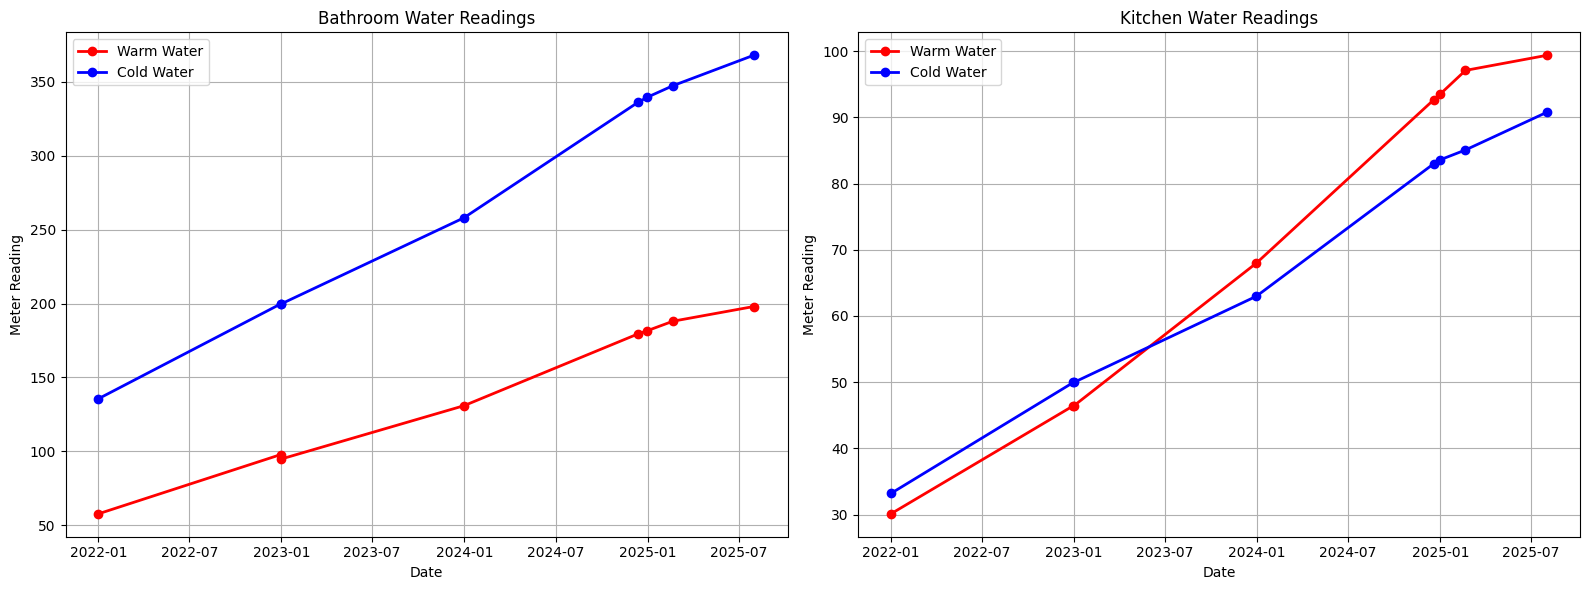

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your JSON
with open("water_data.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Bathroom plot (skip NaNs)
axes[0].plot(
    df.dropna(subset=["bathroom_warm_water"])["date"],
    df.dropna(subset=["bathroom_warm_water"])["bathroom_warm_water"],
    marker="o", color="red", linewidth=2, label="Warm Water"
)
axes[0].plot(
    df.dropna(subset=["bathroom_cold_water"])["date"],
    df.dropna(subset=["bathroom_cold_water"])["bathroom_cold_water"],
    marker="o", color="blue", linewidth=2, label="Cold Water"
)
axes[0].set_title("Bathroom Water Readings")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Meter Reading")
axes[0].legend()
axes[0].grid(True)

# Kitchen plot (skip NaNs)
axes[1].plot(
    df.dropna(subset=["kitchen_warm_water"])["date"],
    df.dropna(subset=["kitchen_warm_water"])["kitchen_warm_water"],
    marker="o", color="red", linewidth=2, label="Warm Water"
)
axes[1].plot(
    df.dropna(subset=["kitchen_cold_water"])["date"],
    df.dropna(subset=["kitchen_cold_water"])["kitchen_cold_water"],
    marker="o", color="blue", linewidth=2, label="Cold Water"
)
axes[1].set_title("Kitchen Water Readings")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Meter Reading")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [33]:
# Add year column
df["year"] = df["date"].dt.year

# Columns
bathroom_cols = ["bathroom_warm_water", "bathroom_cold_water"]
kitchen_cols = ["kitchen_warm_water", "kitchen_cold_water"]

# Last reading per year
yearly_last = df.groupby("year")[bathroom_cols + kitchen_cols].last()

# Yearly consumption (difference), skip first year
yearly_consumption = yearly_last.diff().iloc[1:]

years = yearly_consumption.index.astype(str)
bar_width = 0.35  # width of each bar
x = np.arange(len(years))  # label locations

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Bathroom side-by-side bars ---
axes[0].bar(x - bar_width/2, yearly_consumption["bathroom_warm_water"], width=bar_width, color="red", label="Warm Water")
axes[0].bar(x + bar_width/2, yearly_consumption["bathroom_cold_water"], width=bar_width, color="blue", label="Cold Water")
axes[0].set_title("Bathroom Water Consumption")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Consumption")
axes[0].set_xticks(x)
axes[0].set_xticklabels(years)
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# --- Kitchen side-by-side bars ---
axes[1].bar(x - bar_width/2, yearly_consumption["kitchen_warm_water"], width=bar_width, color="red", label="Warm Water")
axes[1].bar(x + bar_width/2, yearly_consumption["kitchen_cold_water"], width=bar_width, color="blue", label="Cold Water")
axes[1].set_title("Kitchen Water Consumption")
axes[1].set_xlabel("Year")
axes[1].set_xticks(x)
axes[1].set_xticklabels(years)
axes[1].legend()
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


NameError: name 'np' is not defined